---
title: Interactive CTF lineplot
authors: [Toma Susi]
date: 2024/09/04
---

In [13]:
%matplotlib widget
import numpy as np
import abtem

from matplotlib import cm, colors as mcolors, pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from colorspacious import cspace_convert

from IPython.display import display
import ipywidgets

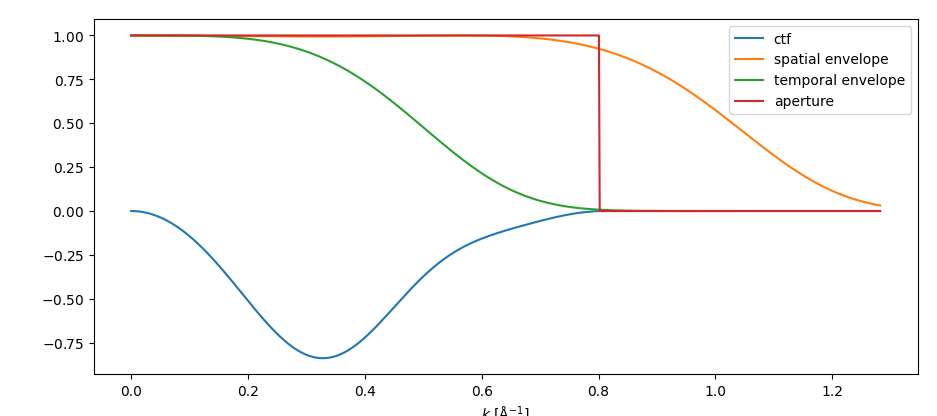

In [14]:
Cs = -20e-6 * 1e10  # 20 micrometers
ene = 80e3

ctf = abtem.CTF(Cs=Cs, energy=ene, defocus="scherzer")

aberration_coefficients = {"C10": -ctf.defocus, "C30": Cs}

ctf = abtem.CTF(aberration_coefficients=aberration_coefficients, energy=ctf.energy)

ctf.semiangle_cutoff = ctf.crossover_angle

Cc = 1.2e-3 * 1e10
energy_spread = 0.35

focal_spread = Cc * energy_spread / ene
ctf.focal_spread = focal_spread

ctf.angular_spread = 1

dpi = 72
ctf.profiles().show(legend=True, figsize=(675/dpi, 300/dpi))
#plt.savefig('../static/ctf_line.png', dpi=600)

In [15]:
# widget figure generation
with plt.ioff():
    dpi = 72
    fig, ax = plt.subplots(1,1, figsize=(675/dpi, 300/dpi), dpi=dpi)

visualization = ctf.profiles(max_angle=60).show(units='mrad', ax=ax)

ax.set_title("Contrast transfer function")

fig.tight_layout()

fig.canvas.resizable = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = True
fig.canvas.layout.width = '675px'
fig.canvas.layout.height = '450px'
fig.canvas.toolbar_position = 'bottom'

In [16]:
def update_ctf(energy, defocus, C30, cutoff, temporal, spatial):

    ax.cla()
    ctf = abtem.CTF(
        energy=energy*1e3, 
        semiangle_cutoff = cutoff,
        defocus = defocus,
        C30 = C30*1e7,
    )

    ctf.focal_spread = temporal
    ctf.angular_spread = spatial

    visualization = ctf.profiles(max_angle=50).show(units='mrad', ax=ax, legend=True)
    fig.canvas.draw_idle()
    return None

In [17]:
style = {
    'description_width': 'initial',
}

energy = ipywidgets.FloatSlider(
    value=80, min=40, max=300, 
    step=5,
    description = "Energy (kV)",
    style = style,
)

defocus = ipywidgets.FloatSlider(
    value = ctf.defocus, min = -200, max = -10, 
    step = 10,
    description = "defocus / -C1 (A)",
    style = style
)

C30 = ipywidgets.FloatSlider(
    value = -20e-3, min = -40e-3, max =0, 
    step = 1e-3,
    description = "C3 (mm)",
    style = style
)

cutoff = ipywidgets.FloatSlider(
    value = ctf.crossover_angle, min = 0, max = 100, 
    step = 1,
    description = "Aperture cutoff (mrad)",
    style = style
)

temporal = ipywidgets.FloatSlider(
    value = ctf.focal_spread, min = 0, max = 100, 
    step = 1,
    description = "Focal spread (A)",
    style = style
)

spatial = ipywidgets.FloatSlider(
    value = ctf.angular_spread, min = 0, max = 10, 
    step = 1,
    description = "Angular spread (mrad)",
    style = style
)


ipywidgets.interactive_output(
    update_ctf, 
    {
        'energy':energy,
        'defocus':defocus,
        'C30':C30,
        'cutoff':cutoff,
        'temporal':temporal,
        'spatial':spatial
    },
)
None

In [18]:
#| label: app:ctf_line

widget = ipywidgets.VBox(
    [
        fig.canvas,
        ipywidgets.HBox([
            ipywidgets.VBox([
                energy,
                defocus,
                C30,
                cutoff,
                temporal,
                spatial
            ]),
        ]),
    ],
)

display(widget);